# Adult data 

In [11]:
import pandas as pd

# Load the Adult dataset from a CSV file
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)

# Set column names for the dataset
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
                'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'income']

# Assign column names to the dataset
data.columns = column_names

# Print the first few rows of the dataset
print(data.head())

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [12]:
data.shape

(32561, 15)

/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


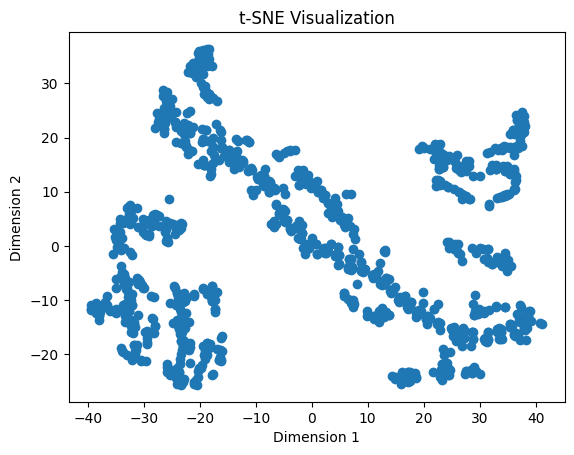

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
features = data[['age', 'education-num', 'hours-per-week']].sample(1000)

# Instantiate the t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Apply t-SNE to the features
embedded_features = tsne.fit_transform(features)

# Create a scatter plot of the embedded features
plt.scatter(embedded_features[:, 0], embedded_features[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

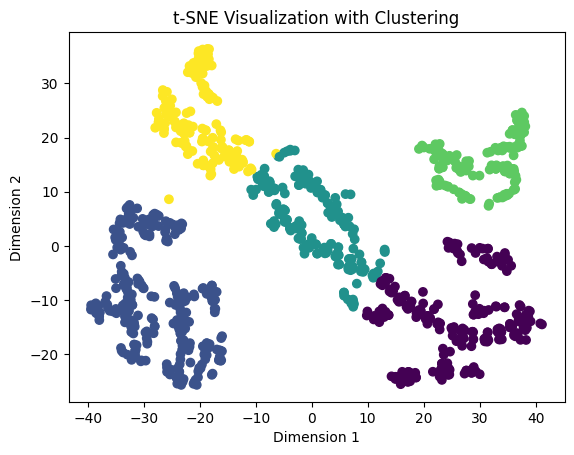

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(embedded_features)
# Get the cluster labels
cluster_labels = kmeans.labels_

# Create a scatter plot of the embedded features with color based on clustering
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], c=cluster_labels)
plt.title('t-SNE Visualization with Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


# Create Model

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score



In [13]:
X = data.drop('income', axis=1)
y = data['income']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: ' Local-gov'

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# Apply label encoding to the categorical variables
label_encoder = LabelEncoder()
data_encoded = data.copy()
for column in data_encoded.columns:
    if data_encoded[column].dtype == 'object':
        data_encoded[column] = label_encoder.fit_transform(data_encoded[column])

# Split the dataset into features (X) and the target variable (y)
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.13397311104860593


In [26]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.13397311104860593


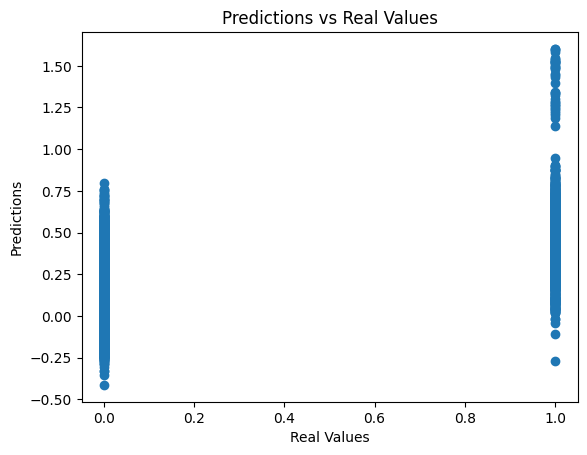

In [26]:
import matplotlib.pyplot as plt

# Plot the predictions vs real values
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Real Values')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print(cm)


In [28]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(cm)


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [27]:
# convert y_pred to binary values 0 or 1
y_pred_binary = [0 if x < 0.5 else 1 for x in y_pred]
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[4758  184]
 [1051  520]]


In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
f1

0.4571428571428572

## LightGBM

In [ ]:
#instead of regression, use classification. Use xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Apply label encoding to the categorical variables

In [16]:
#instead of regression, use classification. Use xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the XGBoost classifier
modelxg = XGBClassifier()
modelxg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelxg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

ModuleNotFoundError: No module named 'xgboost'

In [17]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and the target variable (y)
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the LightGBM classifier
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lgbm.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8782435129740519


In [20]:
# convert y_pred to binary values 0 or 1
y_pred_binary = [0 if x < 0.5 else 1 for x in y_pred]
cm = confusion_matrix(y_test, y_pred_binary)
print(cm)

[[4653  289]
 [ 504 1067]]


In [22]:
# calculate f1 score 
# # more than double the F1 score of the linear regression model
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_binary)
f1

0.7290741373419883